## Exercise 9 - K-nearest neighbors

- Use the same dataset as in previous exercise (ex08) (can be downloaded [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv))
- Dataset includes male and female voice samples with different features
- In this exercise you will use supervised machine learning method called K-nearest neighbors for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
voices = pd.read_csv("data_files/voice.csv")
voices

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


2 filter the data so that only the following columns will be selected: **meanfun** and **IQR**. Then split the dataset so that 75 % of the data will be used for training.

In [3]:
X = voices.to_numpy()[:, [12,5]].astype(float)
y = voices.replace({"label":{"male":0, "female":1}})["label"].to_numpy()
h = .01

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

3 Find the optimal value for k comparing possible values and error rate.

C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Minimum error 0.022727272727272728 and optimal value for k is 12


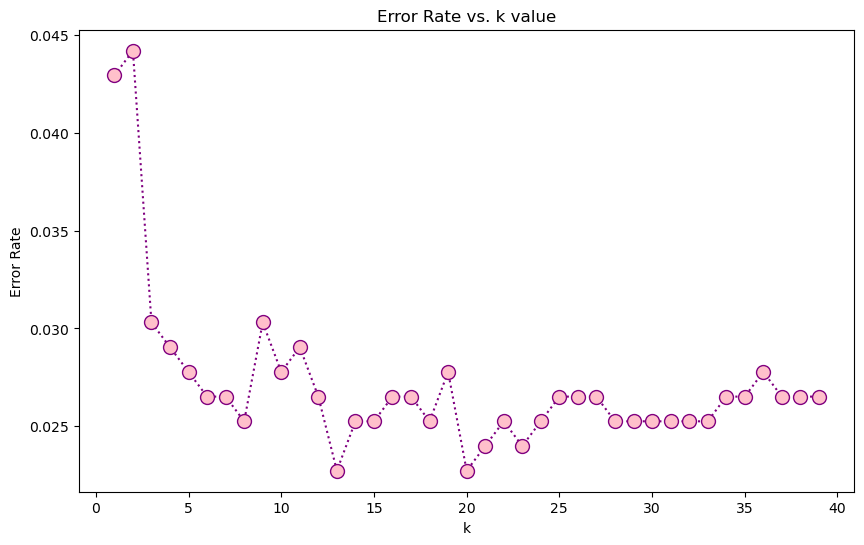

In [4]:
error_rate = []
for i in range(1,40):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate,color = 'purple', linestyle = 'dotted', marker='o', markerfacecolor='pink', markersize=10)
plt.title('Error Rate vs. k value')
plt.xlabel('k')
plt.ylabel('Error Rate')
min_error = error_rate.index(min(error_rate))
print("Minimum error", min(error_rate), "and optimal value for k is", min_error)

4 Define a function and include the following operations inside the function:
   - Define a classifier
   - Fit the data for the classifier
   - Calculate minimum and maximum values for boundaries for meanfun and IQR
   - Run predictions
   - Draw a chart from predicted data utilising previously defined colormaps

Utilise your function and call it using the optimal k value chosen previously.

In [5]:
n_neighbors = min_error

# Neighbors classifier definition. Euclidean will be used as a metric
clf = neighbors.KNeighborsClassifier(n_neighbors, metric = "euclidean")

# Input data and labels to classifier
clf.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

C:\Users\Jouni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


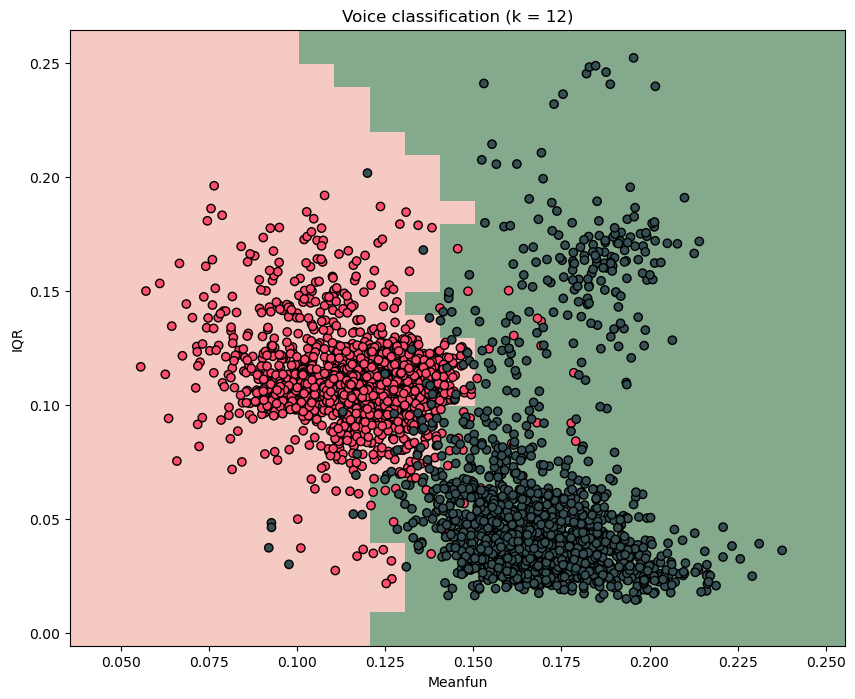

In [6]:
# Calculate minimum and maximum boundaries
x_min, x_max = X[:, 0].min() - 0.02, X[:, 0].max() + 0.02
y_min, y_max = X[:, 1].min() - 0.02, X[:, 1].max() + 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class using data and KNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Create color maps for data visualisation
bg_colors = ListedColormap(["#f5cac3", "#84a98c"])
p_colors = ListedColormap(["#ff4d6d", "#354f52"])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,8))
plt.pcolormesh(xx, yy, Z, cmap = bg_colors, shading = 'auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = p_colors, edgecolors = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Meanfun")
plt.ylabel("IQR")
plt.title("Voice classification (k = %i)" % (n_neighbors))
plt.show()